In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:
df = pd.read_csv("pairs_limpieza.csv", index_col = 0)
df.head(5)

,case_number,year,type,country,area,location,activity,name,age,time,species,injury,fecha_limpia,fatal_limpio,sexo
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,"FATAL, all onboard were killed by sharks",unspecified,Y,F
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,FATAL,May,Y,NaN
2,1792.09.12,1792,Provoked,england,NaN,On the Thames River,Fishing,male,NaN,NaN,NaN,"FATAL, PROVOKED INCIDENT",Sep,Y,M
3,1791.00.00,1791,Unprovoked,australia,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",NaN,NaN,NaN,"FATAL, ""bitten in two""",unspecified,Y,F
4,1788.05.10,1788,Boat,australia,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,"No injury to occupants, shark bit oar and rudder",May,N,NaN


- En este ejercicio tendremos que limpiar los outliers.
¿Sobre que columnas podremos eliminar o reemplazar los outliers?
Identifica visualmente los outliers



Vamos a investigar los outliers de nuestra columna **year** ya que es la única columna numérica.

In [104]:
df["year"].unique()

array([1800, 1797, 1792, 1791, 1788, 1787, 1786, 1785, 1784, 1783, 1780,
       1779, 1776, 1771, 1767, 1764, 1758, 1753, 1751, 1749, 1755, 1748,
       1742, 1738, 1733, 1723, 1721, 1703, 1700, 1642, 1638, 1637, 1617,
       1595, 1580, 1555, 1554, 1543, 1977, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003,
       2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1984, 1994, 1993,
       1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986, 1985, 1983, 1982,
       1981, 1980, 1979, 1978, 1976, 1975, 1974, 1973, 1972, 1971, 1970,
       1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958,
       1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1848,
       1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937,
       1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926,
       1925, 1924, 1923, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915,
       1914, 1913, 1912, 1911, 1910, 1909, 1908, 19

Con esto confirmamos que no hay *nan* de ningún tipo, por lo que podemos calcular los cuartiles con **percentile** y no **nanpercentile**

In [105]:
max = df['year'].max()
max

2018

In [106]:
min = df['year'].min()
min

1543

In [107]:
media = df['year'].mean()
media

1967.3367298200924

Calculando el mínimo, máximo y la media de la columna ya podemos observar que la distancia del max. a la media es 90,84 y con el min. es 1927,16 por lo que ya la media no es representativo y sabriamos que hay outliers.

Tampoco tiene sentido que haya un año 0 por lo que ese será un outlier que tendremos que decidir que hacer con el. Pero antes vamos a realizar un análisis gráfico de nuestra columna mediante un boxplot, para ello, seguimos los siguientes pasos:

1.Calculamos los cuartiles de nuestra columna

In [108]:
q3 = np.percentile(df["year"], 75)
q3

2005.0

In [109]:
q1 = np.percentile(df["year"], 25)
q1

1946.0

2.Vamos a calcular el rango intercuartílico (IQR)

In [110]:
iqr = q3 - q1
iqr

59.0

3.Calculamos los limites superiores e inferiores (los bigotes de nuestro box plot)

In [111]:
outlier_step = 1.5 * iqr
outlier_step

88.5

4.Vamos a dibujar nuestro gráfico de boxplot para echar un vistazo a nuestros datos

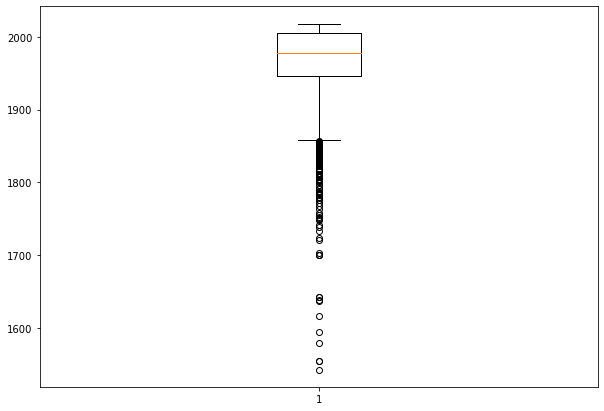

In [112]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(df["year"])
plt.show()

Observamos en nuestros datos que existen 4 valores en la columna ***year*** muy atípicos, el 0 y 5, 77 y 500. Asumimos que esos valores han sido mal registrados y que no son representativos del conjunto.

Ahora pasamos a investigar qué hacer con esos 4 valores, si reemplazarlos o eliminarlos, y después observar cómo se queda nuestro boxplot sin ellos o con ellos modificados.

Vamos a probar a eliminarlos

- Identificamos las filas que son outliers gracias un filtrado.

In [113]:
outliers_data = df[(df["year"] < q1 - outlier_step) | (df["year"] > q3 + outlier_step)]
outliers_data.head()


,case_number,year,type,country,area,location,activity,name,age,time,species,injury,fecha_limpia,fatal_limpio,sexo
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,"FATAL, all onboard were killed by sharks",unspecified,Y,F
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,FATAL,May,Y,NaN
2,1792.09.12,1792,Provoked,england,NaN,On the Thames River,Fishing,male,NaN,NaN,NaN,"FATAL, PROVOKED INCIDENT",Sep,Y,M
3,1791.00.00,1791,Unprovoked,australia,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",NaN,NaN,NaN,"FATAL, ""bitten in two""",unspecified,Y,F
4,1788.05.10,1788,Boat,australia,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,"No injury to occupants, shark bit oar and rudder",May,N,NaN


In [114]:
outliers_data['year'].value_counts()

1852    10
1847     9
1853     8
1855     7
1849     7
        ..
1723     1
1733     1
1738     1
1742     1
1801     1
Name: year, Length: 84, dtype: int64

In [115]:
outliers_data['year'].unique()

array([1800, 1797, 1792, 1791, 1788, 1787, 1786, 1785, 1784, 1783, 1780,
       1779, 1776, 1771, 1767, 1764, 1758, 1753, 1751, 1749, 1755, 1748,
       1742, 1738, 1733, 1723, 1721, 1703, 1700, 1642, 1638, 1637, 1617,
       1595, 1580, 1555, 1554, 1543, 1848, 1857, 1856, 1855, 1853, 1852,
       1851, 1850, 1849, 1847, 1846, 1845, 1844, 1842, 1841, 1840, 1839,
       1837, 1836, 1835, 1834, 1832, 1831, 1830, 1829, 1828, 1827, 1826,
       1825, 1823, 1822, 1819, 1818, 1817, 1816, 1815, 1812, 1811, 1810,
       1808, 1807, 1805, 1804, 1803, 1802, 1801])

Tenemos una lista bastante larga de outliers, pero hay cuatro en especial que no concuerdan con años, como es 0, 5, 77 y 500. Seguramente debido a la existencia de estos, los demás años de la lista también entran como outliers. Por lo tanto, decidimos eliminar las filas de 5, 77 y 500 ya que solo se repiten una vez y como hay tantos 0 decidimos reemplazarlos por un estadístico. Veremos luego si la lista de outliers cambia.

- Sacamos indices de outliers

In [116]:
x = list(outliers_data.index)
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 4697,
 6147,
 6148,
 6149,
 6150,
 6151,
 6152,
 6153,
 6154,
 6155,
 6156,
 6157,
 6158,
 6159,
 6160,
 6161,
 6162,
 6163,
 6164,
 6165,
 6166,
 6167,
 6168,
 6169,
 6170,
 6171,
 6172,
 6173,
 6174,
 6175,
 6176,
 6177,
 6178,
 6179,
 6180,
 6181,
 6182,
 6183,
 6184,
 6185,
 6186,
 6187,
 6188,
 6189,
 6190,
 6191,
 6192,
 6193,
 6194,
 6195,
 6196,
 6197,
 6198,
 6199,
 6200,
 6201,
 6202,
 6203,
 6204,
 6205,
 6206,
 6207,
 6208,
 6209,
 6210,
 6211,
 6212,
 6213,
 6214,
 6215,
 6216,
 6217,
 6218,
 6219,
 6220,
 6221,
 6222,
 6223,
 6224,
 6225,
 6226,
 6227,
 6228,
 6229,
 6230,
 6231,
 6232,
 6233,
 6234,
 6235,
 6236,
 6237,
 6238,
 6239,
 6240,
 6241,
 6242,
 6243,
 6244,
 6245,
 6246,
 6247,
 6248,
 6249,
 6250,
 6251,
 6252,
 6253,
 6254,
 6255,
 6256,
 6257,
 6258,
 6259,
 6

Hacemos una copia por seguridad

In [117]:
df_sin_outliers = df.copy()

- Eliminamos filas

Buscamos los indices de los outliers a eliminar, como en este caso solo son 3 columnas lo buscamos manualmente. 

In [118]:
df_sin_outliers['year'][df_sin_outliers['year'] == 5].index

Int64Index([], dtype='int64')

In [119]:
df_sin_outliers['year'][df_sin_outliers['year'] == 77].index

Int64Index([], dtype='int64')

In [120]:
df_sin_outliers['year'][df_sin_outliers['year'] == 500].index

Int64Index([], dtype='int64')

Creamos una lista con los índices y pasamos a eliminarlos

In [121]:
indices = [44,43,42]

In [122]:
eliminar = df_sin_outliers.drop(df_sin_outliers.index[indices])

Comprobamos que efectivamente están eliminados.

In [123]:
df_sin_outliers.shape

(6281, 15)

In [124]:
eliminar.shape

(6278, 15)

- Reemplazamos los outliers por el estadístico más correcto: la mediana. En este caso donde el año sea 0.

Buscamos los indices del año 0 y reemplazamos

In [125]:
indices_cero = eliminar['year'][eliminar['year'] == 0].index
indices_cero

Int64Index([], dtype='int64')

In [126]:
mediana = eliminar['year'].median()
mediana

1977.0

In [127]:
for i in indices_cero: # iteremos por la lista de valores para cada columna
    eliminar.loc[i] = mediana

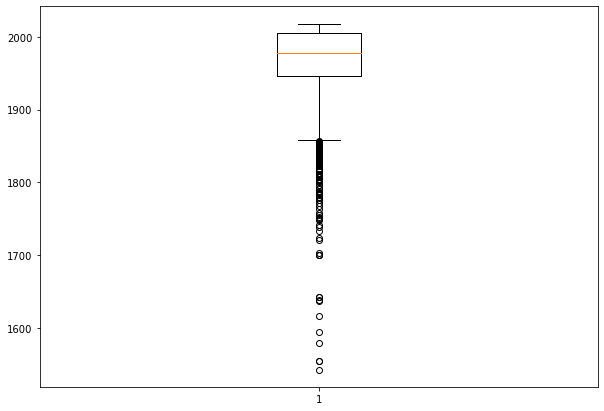

In [128]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(eliminar["year"])
plt.show()

Observamos ahora nuestra nueva gráfica habiendo modificado los outliers. Podemos ver que sigue habiendo valores atípicos pero al ser una columna con años, no tendría mucho sentido eliminar todos los outliers ni siquiera modificarlo, porque estos valores ya si tienen sentido.

In [129]:
eliminar['year'].unique()

array([1800, 1797, 1792, 1791, 1788, 1787, 1786, 1785, 1784, 1783, 1780,
       1779, 1776, 1771, 1767, 1764, 1758, 1753, 1751, 1749, 1755, 1748,
       1742, 1738, 1733, 1723, 1721, 1703, 1700, 1642, 1638, 1637, 1617,
       1595, 1580, 1555, 1554, 1543, 1977, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003,
       2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1984, 1994, 1993,
       1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986, 1985, 1983, 1982,
       1981, 1980, 1979, 1978, 1976, 1975, 1974, 1973, 1972, 1971, 1970,
       1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958,
       1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1848,
       1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937,
       1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926,
       1925, 1924, 1923, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915,
       1914, 1913, 1912, 1911, 1910, 1909, 1908, 19

In [130]:
eliminar['year'].value_counts()

1977    148
2015    143
2017    136
2016    130
2011    128
       ... 
1723      1
1733      1
1738      1
1742      1
1801      1
Name: year, Length: 245, dtype: int64

GUARDAR EN CSV

In [131]:
eliminar.to_csv('pairs_limpieza.csv')